# Introduction to Keras #1
Neural Networks & Deep Learning / Spring 2023, University of Tehran

**Author:** Mohammad Naseri

---

<center>

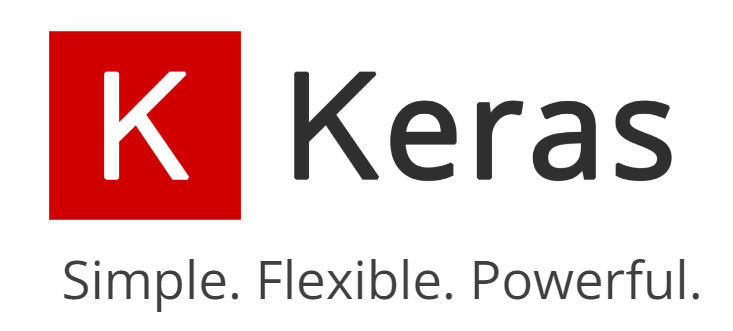
</center>



# 1. Keras Basics


## 1.1 Modules

Pre-defined classes, functions, and variables found in Keras modules are helpful to deep learning algorithms. Learn the modules that Keras has offered for us in this chapter.


- **Initializers** − Provides a list of initializers function.

- **Regularizers** − Provides a list of regularizers function.

- **Constraints** − Provides a list of constraints function.

- **Activations** − Provides a list of activator function.

- **Losses** − Provides a list of loss function.

- **Metrics** − Provides a list of metrics function.

- **Optimizers** − Provides a list of optimizer function.

- **Callback** − Provides a list of callback function. We can use it during the training process to print the intermediate data as well as to stop the training itself (EarlyStopping method) based on some condition.

- **Text processing** − Provides functions to convert text into NumPy array suitable for machine learning. We can use it in data preparation phase of machine learning.

- **Image processing** − Provides functions to convert images into NumPy array suitable for machine learning. We can use it in data preparation phase of machine learning.

- **Sequence processing** − Provides functions to generate time based data from the given input data. We can use it in data preparation phase of machine learning.

- **Backend** − Provides function of the backend library like TensorFlow and Theano.

- **Utilities** − Provides lot of utility function useful in deep learning.

---

## 1.2 Layers

Keras Layers API is a module within the Keras library that provides pre-built layers to simplify the creation of neural networks. It includes a variety of layer types, including fully connected (Dense), convolutional (Conv2D), recurrent (LSTM), pooling (MaxPooling2D), normalization (BatchNormalization), and many others. These layers can be stacked together to create complex models, and can be easily customized with various activation functions, regularization methods, and other parameters. Overall, the Layers API makes it easier for developers to build and train neural networks, without having to implement every layer from scratch.

- Core layers
- Convolution layers
- Pooling layers
- Recurrent layers
- Preprocessing layers
- Normalization layers
- Regularization layers
- Attention layers
- Reshaping layers
- Merging layers
- Locally-connected layers
- Activation layers

Here are some commonly used layers in the Keras Layers API, along with brief explanations:

- **Dense:** A fully connected layer where every neuron is connected to every input in the previous layer.
- **Conv2D:** A 2D convolutional layer that extracts features from image data.
- **LSTM:** A type of recurrent layer that can remember information over long sequences of data.
- **MaxPooling2D:** A pooling layer that reduces the spatial size of the input while retaining important features.
- **BatchNormalization:** A layer that normalizes the output of the previous layer to prevent overfitting and improve network performance.
- **Dropout:** A regularization layer that randomly drops out a fraction of the inputs to prevent overfitting.
- **Flatten:** A layer that flattens the input into a 1D array, often used before a fully connected layer.
- **Embedding:** A layer that maps discrete values (such as words in natural language processing) to dense vectors for use in neural networks.
These are just a few examples of the many layer types available in the Keras Layers API, each with their own specific uses and parameters.


---

## 1.3 Models

We'll learn the fundamentals of Keras coding in this section of the course! Depending on the task at hand, you can choose from 3 major APIs in Keras. Sequential API, Functional API, and Model subclassing. With each of these APIs, we'll construct basic models and discover when to use them.

In [1]:
from tensorflow import keras
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

# Generate a binary dataset with 2 features and 2 classes
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

print(f'Features:\n {X[:10]}\n\n')
print(f'Targets:\n {y[:10]}')

Features:
 [[ -3.05837272   4.48825769]
 [ -8.60973869  -3.72714879]
 [  1.37129721   5.23107449]
 [ -9.33917563  -2.9544469 ]
 [-11.57178593  -3.85275513]
 [-11.42257341  -4.85679127]
 [-10.44518578  -3.76476563]
 [-10.44603561  -3.26065964]
 [ -0.61947075   3.48804983]
 [-10.91115591  -4.5772537 ]]


Targets:
 [0 1 0 1 1 1 1 1 0 1]


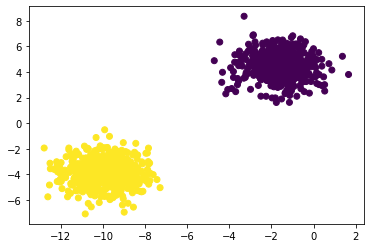

In [3]:
import matplotlib.pyplot as plt

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'TRAIN: {X_train.shape}, {y_train.shape}')
print(f'Test: {X_test.shape}, {y_test.shape}')
print(f'Val: {X_val.shape}, {y_val.shape}')

TRAIN: (640, 2), (640,)
Test: (200, 2), (200,)
Val: (160, 2), (160,)


### 1.3.1 Sequential API
Sequential API is the simplest API to use but the disadvantage of the sequential API is that it can only be used to train simple models. Only models that are essentially a stack of layers can be implemented, which isn't always the case.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model_seq = Sequential()
model_seq.add(Dense(1, input_dim=2, activation='sigmoid'))
# model_seq.add(....)

### 1.3.2 Functional API
The Sequential API is a quick approach to construct relatively simple models, but the Functional API must be used to implement more sophisticated models, such as those with numerous inputs and outputs or non-sequential models.
Imagine a model like this:

<center>

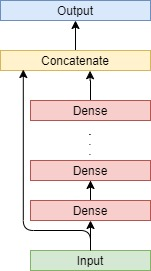
</center>

Such a model cannot be produced with Sequential API! "Wide and deep" is the name given to this type. The idea is that we want our model to pick up both simple and deep characteristics. This kind of design is employed in recommender systems.

In [6]:
from keras.models import Model 
from keras.layers import Input 

inputs = Input(shape=(2, ))

x = Dense(1, input_dim=2, activation='sigmoid')(inputs)

# y = Desne(....)(x)

model_func = Model(inputs=inputs, outputs=x)

### 1.3.3 Model Subclassing
You can make almost any model using the Functional API, but there are cases when you'll need even more flexibility. For example if you have a model that contains loops or conditional branching, you can't use the Functional API because you can only make models that are DAGs(Directed Acyclic Graph) of layers with the Functional API.

There is a very big difference between keras subclassed model and other keras models (Sequential and Functional).

Sequential models and Functional models are datastructures that represent a DAG of layers. In simple words, Functional or Sequential model are static graphs of layers built by stacking one on top of each other like LEGO. So when you provide input_shape to first layer, these (Functional and Sequential) models can infer shape of all other layers and build a model. Then you can print input/output shapes using model.summary().

On the other hand, subclassed model is defined via the body (a call method) of Python code. For subclassed model, there is no graph of layers here. We cannot know how layers are connected to each other (because that's defined in the body of call, not as an explicit data structure), so we cannot infer input / output shapes. So for a subclass model, the input/output shape is unknown to us until it is first tested with proper data. 

In [7]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self, units=1, activation=None):
        super(MyModel, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.dense_layer = tf.keras.layers.Dense(units=self.units, activation=self.activation)
        super(MyModel, self).build(input_shape)
    
    def call(self, input):
        output = self.dense_layer(input)

        # y = self.x(out)... 

        return output

In [8]:
model_sub = MyModel(units=1, activation='sigmoid')

---

## 1.4 Compiling Keras Model



In [9]:
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_func.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_sub.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_sub.build(input_shape=(None, 2))
model_sub.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             multiple                  3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


---

## 1.5 Training Keras Model


In [12]:
history_seq = model_seq.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 0.2617 - accuracy: 1.0000 - val_loss: 0.2179 - val_accuracy: 1.0000
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1806 - accuracy: 1.0000 - val_loss: 0.1607 - val_accuracy: 1.0000
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 1.0000 - val_loss: 0.1274 - val_accuracy: 1.0000
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 1.0000 - val_loss: 0.1050 - val_accuracy: 1.0000
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0920 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 1.0000
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0672 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 1.0000
Epoch 8/100
6

In [13]:
history_func = model_func.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/100
6

In [14]:
history_sub = model_sub.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 2.3250 - accuracy: 0.5109 - val_loss: 2.0762 - val_accuracy: 0.5125
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 1.8996 - accuracy: 0.5109 - val_loss: 1.6597 - val_accuracy: 0.5125
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 1.4903 - accuracy: 0.5141 - val_loss: 1.2711 - val_accuracy: 0.5125
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 1.1219 - accuracy: 0.5297 - val_loss: 0.9321 - val_accuracy: 0.5562
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.8140 - accuracy: 0.5750 - val_loss: 0.6685 - val_accuracy: 0.6062
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6531 - val_loss: 0.4751 - val_accuracy: 0.7188
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.7766 - val_loss: 0.3435 - val_accuracy: 0.8000
Epoch 8/100
6

---

## 1.6 Evaluating Keras Model


### 1.6.1 Getting Metric Values

In [17]:
loss_seq, accuracy_seq = model_seq.evaluate(X_test, y_test, verbose='0')

print(f'Test loss: {loss_seq}')
print(f'Test accuracy: {accuracy_seq}')

Test loss: 0.0007332474924623966
Test accuracy: 1.0


In [18]:
loss_func, accuracy_func = model_func.evaluate(X_test, y_test, verbose='0')

print(f'Test loss: {loss_func}')
print(f'Test accuracy: {accuracy_func}')

Test loss: 6.623142689932138e-05
Test accuracy: 1.0


In [19]:
loss_sub, accuracy_sub = model_sub.evaluate(X_test, y_test, verbose='0')

print(f'Test loss: {loss_sub}')
print(f'Test accuracy: {accuracy_sub}')

Test loss: 0.0022671737242490053
Test accuracy: 1.0


### 1.6.2 Plotting Train and Validation Accuracy

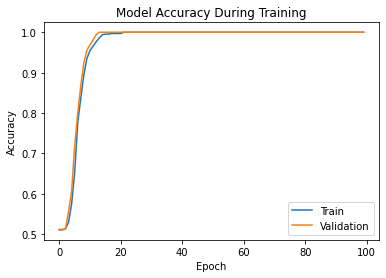

In [22]:
plt.plot(history_sub.history['accuracy'])
plt.plot(history_sub.history['val_accuracy'])
plt.title('Model Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 1.6.3 Custom Metrics

Using Keras Backend

In [23]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [24]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', precision_m, recall_m, f1_m])

Epoch 1/10
20/20 [==============================] - 1s 18ms/step - loss: 5.9212 - accuracy: 0.1125 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 5.8236 - val_accuracy: 0.0812 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 5.7639 - accuracy: 0.1156 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 5.6677 - val_accuracy: 0.0812 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 5.6076 - accuracy: 0.1187 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 5.5106 - val_accuracy: 0.0875 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 5.4490 - accuracy: 0.1219 - precision_m: 0.0000e+00 - recall_m:

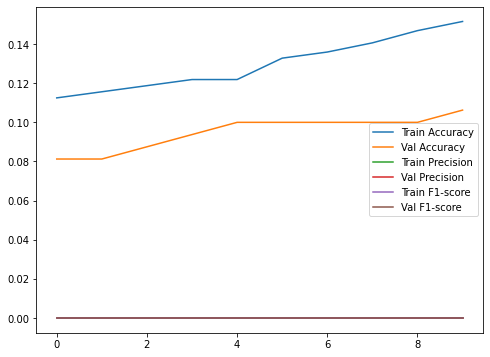

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot the accuracy, loss, precision, recall, and F1-score metrics for the training and validation sets
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['precision_m'], label='Train Precision')
plt.plot(history.history['val_precision_m'], label='Val Precision')
plt.plot(history.history['f1_m'], label='Train F1-score')
plt.plot(history.history['val_f1_m'], label='Val F1-score')
plt.legend()
plt.show()

### 1.6.4 Confusion Matrix

In [36]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

7/7 [==============================] - 0s 3ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

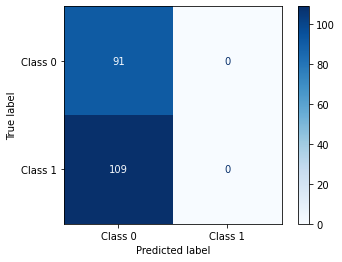

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

class_names=['Class 0', 'Class 1']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

---

## 1.7 Save Keras Model

In [38]:
model.save('my_model.h5')

---

## 1.8 Load Keras Model

In [40]:
from keras.models import load_model

loaded_model = load_model('my_model.h5', custom_objects={'precision_m': precision_m, 'recall_m': recall_m, 'f1_m': f1_m})
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
